In [19]:
import pandas as pd
import networkx as nx
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy as sp
from scipy import stats

In [14]:
#2.a Cargamos el archivo y con la libreria Networkx obtenemos la Matriz de Adyacencia.
# Esta Matriz de Adyacencia que entrega la libreria, es con pesos.
G = nx.Graph(nx.read_pajek("/Users/angelamartinezcanelo/Desktop/datosT3/pescado.net"))
M = nx.adjacency_matrix(G, nodelist=None, weight='weight') #Obtenemos la Matriz de adyacencia
a,b = M.shape 
M_array = sp.sparse.csr_matrix.toarray(M) #Convertimos la Matriz de Adyacencia en un Array para trabajar mas facilmente.
print("La matriz de adyacencia del Grafo Pescados es : ")
print(M_array)

La matriz de adyacencia del Grafo Pescados es : 
[[0.    0.983 0.664 ... 0.    0.    0.   ]
 [0.983 0.    0.    ... 0.    0.    0.   ]
 [0.664 0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [15]:
print("Determinamos el numero de nodos y conexiones, para calcular a_hat:")
n=G.number_of_nodes()
print("Numero de nodos :",n)
m=G.number_of_edges()
print("Numero de conexiones :",m)
a_hat=m/(n*(n-1)) 
print("a_hat :",a_hat)

Determinamos el numero de nodos y conexiones, para calcular a_hat:
Numero de nodos : 151
Numero de conexiones : 2103
a_hat : 0.0928476821192053


In [16]:
# Determinamos la sumatoria de a_ij*a_ji, para luego sacar rho_1 y rho. Version CON PESO
su=0

for i in range(0,a):
    for j in range(0,b):
        if i!=j:
            su += M_array[i][j]*M_array[j][i]


a_to=su/2
rho_1=(1/m)*a_to
rho=(rho_1-a_hat)/(1-a_hat)
print("sumatoria de la multiplicacion de a con i!=j :",a_to)
print("rho_1 :",rho_1)
print("rho :",rho)

sumatoria de la multiplicacion de a con i!=j : 6082562.095854045
rho_1 : 2892.3262462453854
rho : 3188.255534990898


In [17]:
# Determinamos la sumatoria de a_ij*a_ji, para luego sacar rho_1 y rho. Version SIN PESO
su=0
for i in range(0,a):
    for j in range(0,b):
        if i!=j:
            if M_array[i][j]!=0 and M_array[j][i]!=0:
                su +=1 
            
            

a_to=su/2
rho_1=(1/m)*a_to
rho=(rho_1-a_hat)/(1-a_hat)
print("sumatoria de la multiplicacion de a con i!=j :",a_to)
print("rho_1 :",rho_1)
print("rho :",rho)

sumatoria de la multiplicacion de a con i!=j : 2103.0
rho_1 : 1.0
rho : 1.0


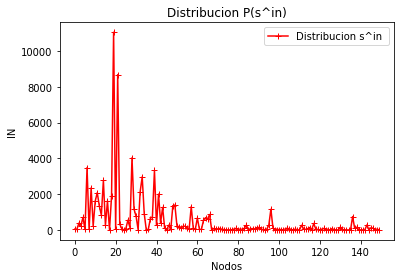

Media In:  512.1350733333334
Moda In :  ModeResult(mode=array([0.112]), count=array([1]))
Mediana In:  71.01499999999999


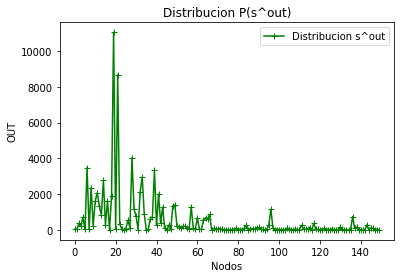

Media Out:  512.1350733333334
Moda Out :  ModeResult(mode=array([0.112]), count=array([1]))
Mediana Out :  71.01499999999999


In [22]:
#2.c Graficar las distribuciones P(s^in) y P(s^out).
G = nx.Graph(nx.readwrite.gml.read_gml("/Users/angelamartinezcanelo/Desktop/datosT3/pescado.gml"))
M = nx.adjacency_matrix(G, nodelist=None, weight='weight')

Edges_array=np.empty(0)

i=0
for n, nbrs in G.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['value']
        i=i+1
        #print(f"({n}, {nbr}, {wt:.3})")
        N=int(n)
        Nbr=int(nbr)
        Edges_array=np.append(Edges_array,N)
        Edges_array=np.append(Edges_array,Nbr)
        Edges_array=np.append(Edges_array,wt)
        
Edges_array=Edges_array.reshape(i,3) 
a,b=Edges_array.shape

Ps_in=[]
Ps_out=[]
for i in range(1,151):
    suma=0
    for n in range(0,a):
        if Edges_array[n][1]==i:
            suma=suma+Edges_array[n][2]
            
    Ps_in.append(suma)
for i in range(1,151):
    suma=0
    for n in range(0,a):
        if Edges_array[n][0]==i:
            suma=suma+Edges_array[n][2]
            
    Ps_out.append(suma)
    
#Grafico de la distribucion de s^in
plt.plot(Ps_in, color='r',marker='+', label="Distribucion s^in ")
plt.xlabel("Nodos")
plt.ylabel("IN")
plt.title("Distribucion P(s^in)")
plt.legend()
plt.show()   

MediaIn= np.mean(Ps_in)
print('Media In: ',MediaIn)

ModaPs_in =stats.mode(Ps_in)
print('Moda In : ',ModaPs_in )

Mediana=np.median(Ps_in)
print('Mediana In: ',Mediana)

#Grafico Distribucion s^out
plt.plot(Ps_out, color='g',marker='+', label="Distribucion s^out")
plt.xlabel("Nodos")
plt.ylabel("OUT")
plt.title("Distribucion P(s^out)")
plt.legend()
plt.show()


MediaOut= np.mean(Ps_out)
print('Media Out: ',MediaOut)

ModaOut =stats.mode(Ps_out)
print('Moda Out : ',ModaOut )

MedianaOut=np.median(Ps_out)
print('Mediana Out : ',MedianaOut)

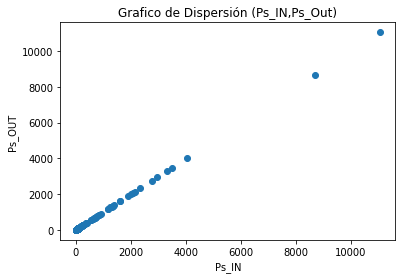

In [60]:
#Se realiza el grafico de Dispersion para (s^in,s^out)
fig,ax= plt.subplots()
ax.scatter(Ps_in,Ps_out)
plt.xlabel("Ps_IN")
plt.ylabel("Ps_OUT")
plt.title("Grafico de Dispersión (Ps_IN,Ps_Out)")
plt.show()

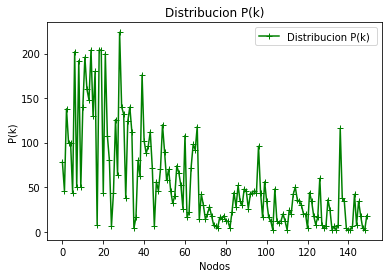

Media Degree:  55.89333333333333
Moda Degree :  ModeResult(mode=array([44]), count=array([8]))
Mediana Degree:  41.0


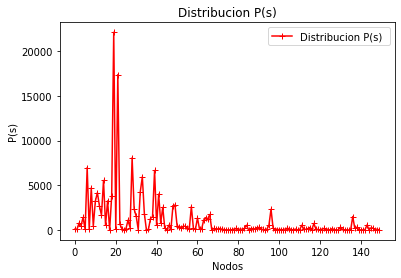

Media Ps :  1024.2701466666667
Moda Ps :  ModeResult(mode=array([0.224]), count=array([1]))
Mediana Ps:  142.02999999999997


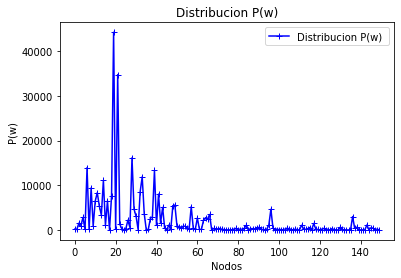

Media W:  512.1350733333334
Moda W :  ModeResult(mode=array([0.112]), count=array([1]))
Mediana W :  284.06


In [25]:
#2.e
#Calculamos P(s) sumando los arreglos anteriores.
Ps_total=[]
for i in range(0,len(Ps_out)):
    Pst=Ps_in[i]+Ps_out[i]
    Ps_total.append(Pst)
    
#Calculamos el grado de cada nodo
P_degree=[]
for i in range(1,151):
    suma=0
    for n in range(0,a):
        if Edges_array[n][1]==i or Edges_array[n][0]==i:
            suma=suma+1
            
    P_degree.append(suma)
#Calculamos el Peso de Cada nodo sumando los pesos de las conexiones que tiene.
P_w=[]
for i in range(1,151):
    suma=0
    for n in range(0,a):
        if Edges_array[n][1]==i or Edges_array[n][0]==i:
            suma=suma+Edges_array[n][2]+Edges_array[n][2]
            
    P_w.append(suma)

#Realizamos los gráficos
#Grafico Dispersion P(k)
plt.plot(P_degree, color='g',marker='+', label="Distribucion P(k) ")
plt.xlabel("Nodos")
plt.ylabel("P(k)")
plt.title("Distribucion P(k)")
plt.legend()
plt.show() 
MediaD = np.mean(P_degree)
print('Media Degree: ',MediaD)

ModaD = stats.mode(P_degree)
print('Moda Degree : ',ModaD)

MedianaD = np.median(P_degree)
print('Mediana Degree: ',MedianaD)

#Grafico Distribucion P(s)
plt.plot(Ps_total, color='r',marker='+', label="Distribucion P(s) ")
plt.xlabel("Nodos")
plt.ylabel("P(s)")
plt.title("Distribucion P(s)")
plt.legend()
plt.show()      

MediaTo= np.mean(Ps_total)
print('Media Ps : ',MediaTo)

ModaTo =stats.mode(Ps_total)
print('Moda Ps : ',ModaTo)

MedianaTo=np.median(Ps_total)
print('Mediana Ps: ',MedianaTo)



#Grafico Dispersion P(w)
plt.plot(P_w, color='b',marker='+', label="Distribucion P(w) ")
plt.xlabel("Nodos")
plt.ylabel("P(w)")
plt.title("Distribucion P(w)")
plt.legend()
plt.show() 

MediaW = np.mean(P_w)
print('Media W: ',MediaIn)

ModaW = stats.mode(P_w)
print('Moda W : ',ModaPs_in )

MedianaW = np.median(P_w)
print('Mediana W : ',MedianaW)


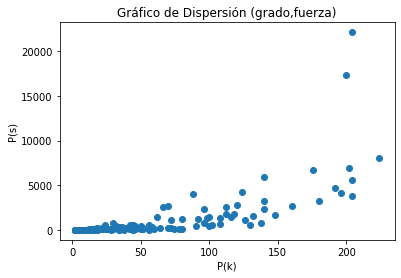

In [62]:
#Se realiza el grafico de Dispersion para (k,s)

fig,ax= plt.subplots()
ax.scatter(P_degree,Ps_total)
plt.xlabel("P(k)")
plt.ylabel("P(s)")
plt.title("Gráfico de Dispersión (grado,fuerza)")
plt.show()



In [37]:
#2.g Coeficiente de clustering
StrW = str(P_w)
Av_clustering_Sin = nx.average_clustering(G, nodes=None, weight=None, count_zeros=True)
Av_clustering_Con = nx.average_clustering(G, nodes=None, weight= StrW, count_zeros=True)
print('Coeficiente de clustering Sin Peso : ',Av_clustering_Sin)
print('Coeficiente de clustering Con Peso : ',Av_clustering_Con)

Coeficiente de clustering Sin Peso :  0.7477557030117123
Coeficiente de clustering Con Peso :  0.7477557030117123
